In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import pandas as pd


csv_file_path = 'data.csv'


try:
    df = pd.read_csv(csv_file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(csv_file_path, encoding='latin-1')

df.head()

,L,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [8]:
df.isnull().sum()

L              0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df = df.dropna(subset=['CustomerID'])

In [10]:
df.duplicated().sum()

5225

In [11]:
df = df.drop_duplicates()

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
from datetime import datetime
import pandas as pd

present = datetime(2023, 11, 30)


df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
recency_df = (present - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days


frequency_df = df.groupby('CustomerID')['StockCode'].nunique()
monetary_df = df.groupby('CustomerID')['Quantity'].sum() * df.groupby('CustomerID')['UnitPrice'].mean()
rfm_df = pd.DataFrame({
    'CustomerID': recency_df.index,
    'Recency': recency_df.values,
    'Frequency': frequency_df.values,
    'Monetary': monetary_df.values,
})

rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,4698,1,0.000000
1,12347.0,4375,103,6498.979011
2,12348.0,4448,22,13495.487419
3,12349.0,4391,73,5230.384932
4,12350.0,4683,17,756.711765


Recency: 


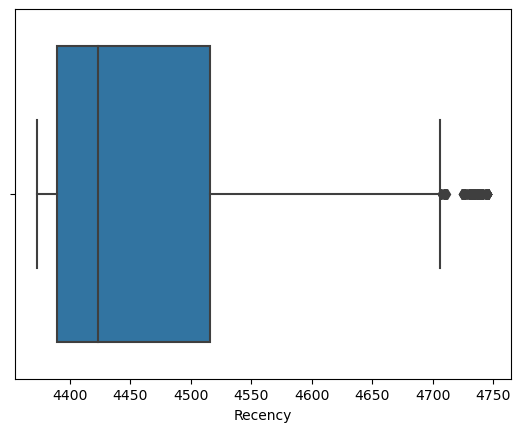

Frequency: 


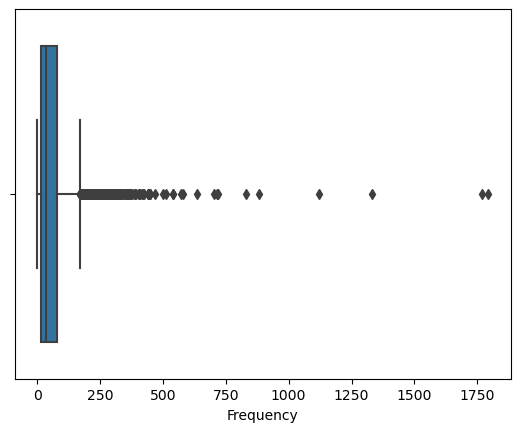

Monetary: 


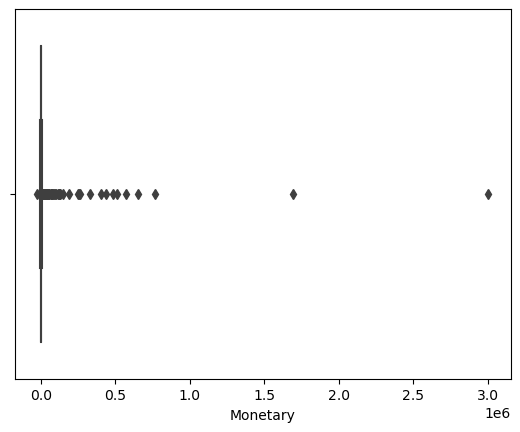

In [21]:
list1 = ['Recency','Frequency','Monetary']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()

In [22]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    copy = data.copy()
    print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print(lower_range,upper_range)
    #np.where(condition, true, false)
    copy[col] = np.where(
    copy[col] > upper_range,
    upper_range,
    np.where(
        copy[col] < lower_range,
        lower_range,
        copy[col]
        )
    )

    return copy

In [23]:
final_recency = removeOutliers(rfm_df,'Recency')
final_frequency = removeOutliers(final_recency,'Frequency')
final_rfm_df = removeOutliers(final_frequency,'Monetary')

IQR value for column Recency is: 127.0
4198.5 4706.5
IQR value for column Frequency is: 62.0
-78.0 170.0
IQR value for column Monetary is: 2267.7856272910553
-2943.1617221865827 6127.980786977638


Recency before and after outlier capping using IQR


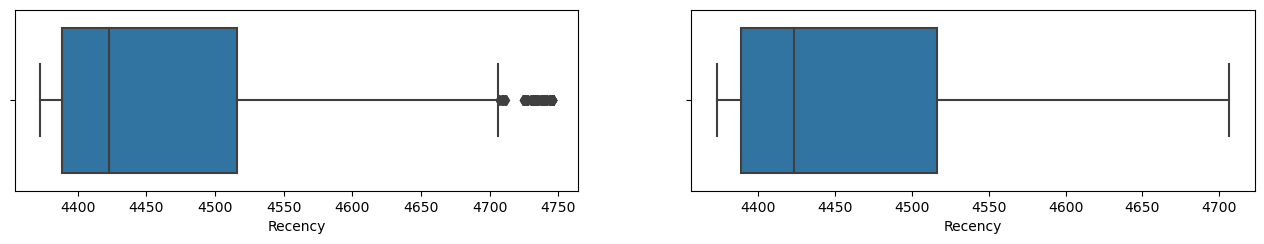

Frequency before and after outlier capping using IQR


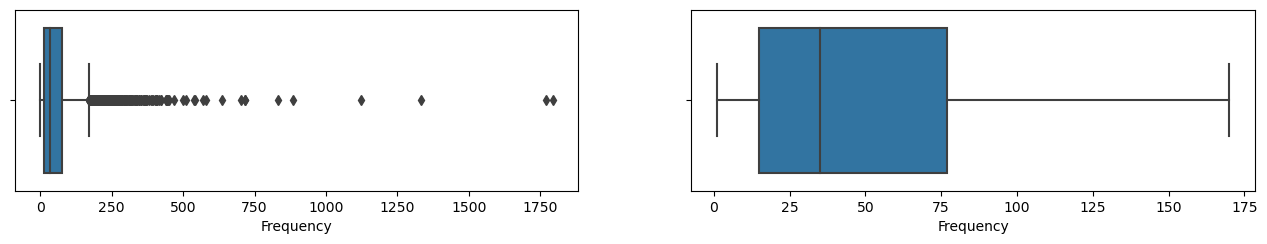

Monetary before and after outlier capping using IQR


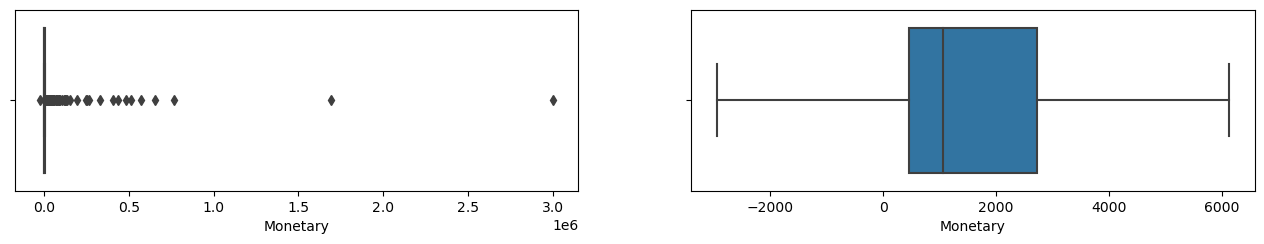

In [24]:
i = 1 
for col in ['Recency','Frequency','Monetary']:
    print(col+' before and after outlier capping using IQR')
    plt.figure(figsize=(16,8))
    plt.subplot(3,2,i)
    sns.boxplot(x=rfm_df[col])
    plt.subplot(3,2,i+1)
    sns.boxplot(x=final_rfm_df[col])
    ++i
    plt.show()

In [16]:
#7

# Import necessary libraries
import pandas as pd

# Assuming your dataset is in a variable named df
# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate the time between the first and last purchase for each customer
df['Lifespan'] = (df.groupby('CustomerID')['InvoiceDate'].transform('max') -
                  df.groupby('CustomerID')['InvoiceDate'].transform('min')).dt.days

# Calculate the average lifespan
average_lifespan = df['Lifespan'].mean()
print("Average Customer Lifespan:", average_lifespan)

Average Customer Lifespan: 242.61455065188593


In [18]:
#8
#Create a new column 'Return' indicating whether Quantity is less than 0 (negative)

df['Return'] = df['Quantity'] < 0

# Calculate the percentage of orders with returns/refunds
return_percentage = (df[df['Return']].shape[0] / df.shape[0]) * 100

# Print the result
print("Percentage of Orders with Returns/Refunds:", return_percentage)


Percentage of Orders with Returns/Refunds: 2.209141343213713


In [19]:
contingency_table = pd.crosstab(df['Description'], df['Return'])
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-square p-value:", p)

Chi-square p-value: 0.0


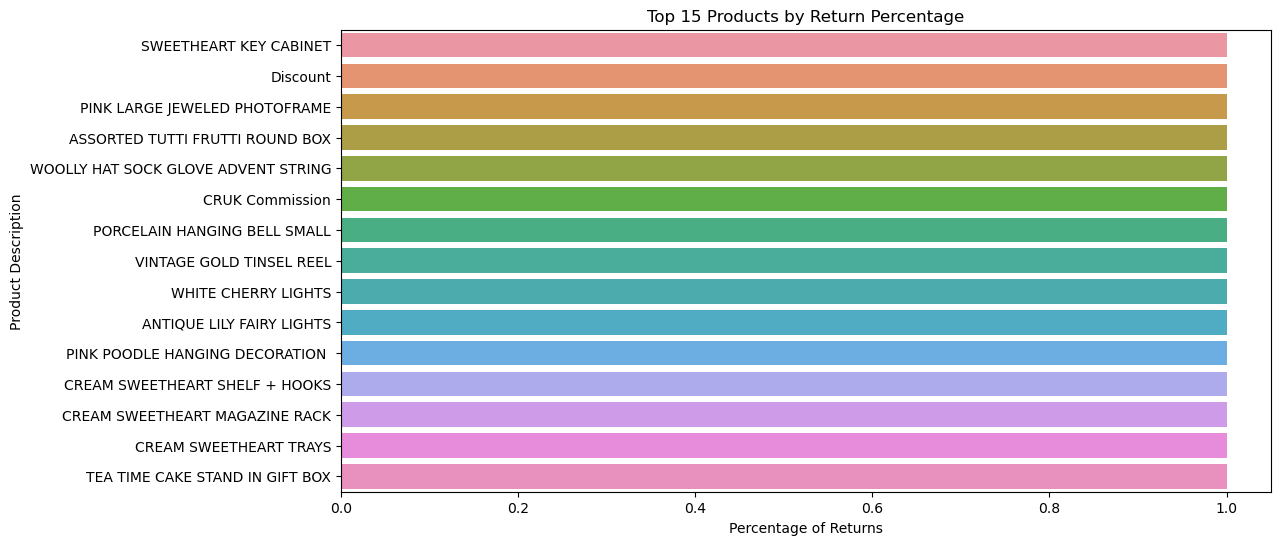

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot to visualize the percentage of returns by product description
return_percentage_by_product = df.groupby('Description')['Return'].mean().reset_index()
return_percentage_by_product = return_percentage_by_product.sort_values(by='Return', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Return', y='Description', data=return_percentage_by_product.head(15))
plt.title('Top 15 Products by Return Percentage')
plt.xlabel('Percentage of Returns')
plt.ylabel('Product Description')
plt.show()
